<a href="https://colab.research.google.com/github/suyash456/Image-Denoising/blob/main/Denoised_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D , Input, BatchNormalization, MaxPool2D
from tensorflow.keras.datasets import cifar10
from keras.models import Model
import numpy as np
from keras.callbacks import ModelCheckpoint

In [ ]:
(X_train , _) ,(X_test, _) = cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

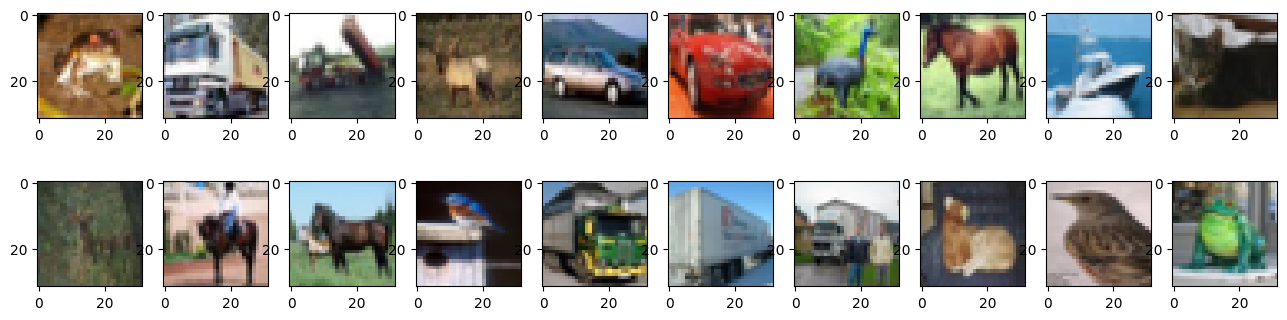

In [ ]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2,10, figsize = (16, 4))

count = 0

for i in range(2):
    for j in range(10):
        axes[i,j].imshow(X_train[count],)
        count+=1

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# prepare source data
#Adding Noise
noise_factor = 0.1

X_train_noise = X_train + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_test.shape)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

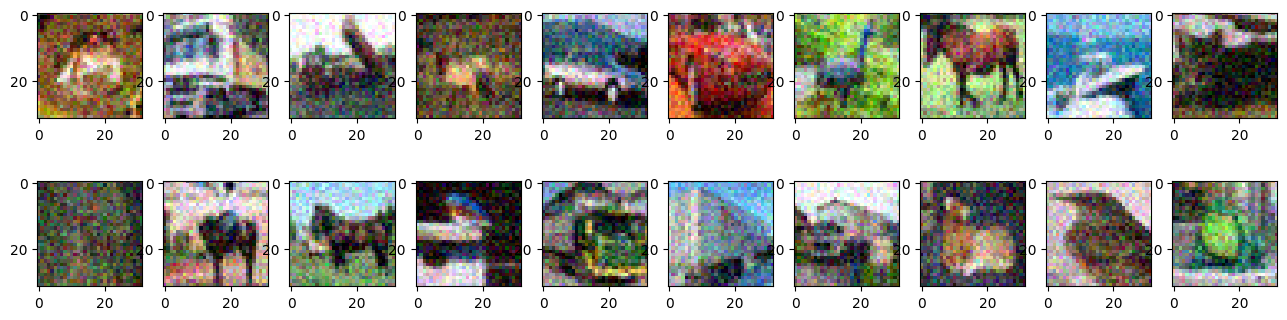

In [ ]:
fig, axes = plt.subplots(2,10, figsize = (16,4))

count = 0
for i in range(2):
    for j in range(10):
        axes[i,j].imshow(X_train_noise[count])
        count+=1

In [ ]:
# Building Model
# encoder
encoder_input = Input(shape = X_train.shape[1:])
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)

# decoder
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(3, (3,3), activation = 'sigmoid', padding = 'same')(x) # Change the number of output channels to 3

#Autoencoder
autoencoder = Model(encoder_input, decoded, name = 'Denoising_Model')
autoencoder.summary()

Model: "Denoising_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)    

In [ ]:
#compile Model
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam' ,metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("denoising_model.h5", save_best_only=True, save_weights_only=False, verbose = 1)
history = autoencoder.fit(X_train_noise, X_train, batch_size = 128, epochs = 50, callbacks = checkpoint, validation_split = 0.25, verbose = 2)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.60102, saving model to denoising_model.h5
293/293 - 11s - loss: 0.5810 - accuracy: 0.6050 - val_loss: 0.6010 - val_accuracy: 0.5973 - 11s/epoch - 37ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.60102 to 0.56606, saving model to denoising_model.h5
293/293 - 3s - loss: 0.5649 - accuracy: 0.7068 - val_loss: 0.5661 - val_accuracy: 0.7167 - 3s/epoch - 12ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.56606 to 0.56314, saving model to denoising_model.h5
293/293 - 3s - loss: 0.5622 - accuracy: 0.7271 - val_loss: 0.5631 - val_accuracy: 0.7325 - 3s/epoch - 10ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.56314
293/293 - 3s - loss: 0.5606 - accuracy: 0.7394 - val_loss: 0.5633 - val_accuracy: 0.7480 - 3s/epoch - 11ms/step
Epoch 5/50

Epoch 5: val_loss improved from 0.56314 to 0.56065, saving model to denoising_model.h5
293/293 - 3s - loss: 0.5598 - accuracy: 0.7466 - val_loss: 0.5607 - val_accuracy: 0.7492 - 3s/epoch - 11ms/step
Epoch 6/50

Epoch 6: val_loss improved from 0.56065 to 0.56035, saving model to denoising_model.h5
293/293 - 3s - loss: 0.5588 - accuracy: 0.7512 - val_loss: 0.5603 - val_accuracy: 0.7405 - 3s/epoch - 12ms/s

313/313 [==============================] - 1s 2ms/step


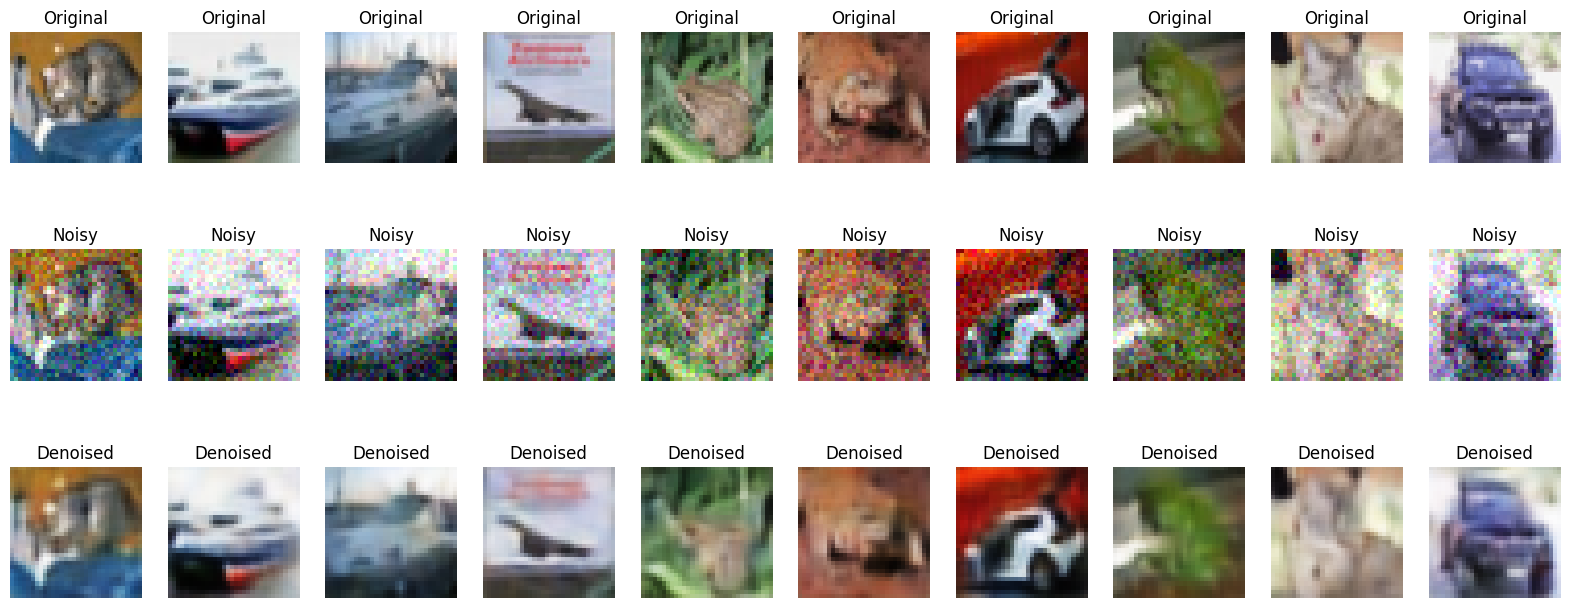

In [ ]:
# Predict denoised images
denoised_images = autoencoder.predict(X_test_noise)

# Plot real, noisy, and denoised images
fig, axes = plt.subplots(3, 10, figsize=(20, 8))
for i in range(10):
    # Real images
    axes[0, i].imshow(X_test[i])
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')
    # Noisy images
    axes[1, i].imshow(X_test_noise[i])
    axes[1, i].set_title('Noisy')
    axes[1, i].axis('off')
    # Denoised images
    axes[2, i].imshow(denoised_images[i])
    axes[2, i].set_title('Denoised')
    axes[2, i].axis('off')

plt.show()
